# Krok 1. Aktywacja wszystkich bibliotek

In [3]:
import os

In [4]:
import gym 
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
import time
import pygame
import sys
import numpy as np
import random
from gym import spaces


# Krok 2. Aktywacja klas QLearningAgent i Environment

In [5]:
class QLearningAgent:
    def __init__(self, state_space_size, action_space_size, learning_rate=0.1, discount_factor=0.9, exploration_prob=0.1):
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_prob = exploration_prob
        self.action_space_size = action_space_size
        self.q_values = np.zeros((state_space_size, action_space_size))

    def select_action(self, state):
        if np.random.rand() < self.exploration_prob:
            return np.random.randint(self.action_space_size)
        else:
            return np.argmax(self.q_values[state, :])

    def update_q_values(self, state, action, reward, next_state, done):
        if done:
            target = reward
        else:
            target = reward + self.discount_factor * np.max(self.q_values[next_state, :])
        if action < 8:
            self.q_values[state, action] = (1 - self.learning_rate) * self.q_values[state, action] + self.learning_rate * target
        
        

# Inicjalizacja środowiska i agenta


In [13]:

class Environment(gym.Env):
    def __init__(self):
        super(Environment, self).__init__()

        # Inicjalizacja Pygame
        pygame.init()
        self.agent = QLearningAgent(state_space_size=24**3, action_space_size=64)
        # Ustawienia okna
        self.s = 1 #czynnik skalujący , 1.28 do 400x400
        #musimy nasz algorytm dostosować do skali...
        self.width, self.height = int(512//self.s), int(512//self.s) #oryginalny size , stare: 512x512
        self.window_size = (self.width, self.height)
        self.window = pygame.display.set_mode(self.window_size)
        pygame.display.set_caption("Dostosowanie anten pod LOS/NLOS")

        # Kolory RGB
        self.brown = (0, 128, 255)
        self.red = (255, 128, 64)
        self.white = (255, 255, 255)

        # Wymiary kwadratu i prostokąta
        self.rectangle_size = (int(100/self.s), int(50/self.s))  # Wymiary prostokąta (szerokość, wysokość) #stare: 100x50

        # Pozycje prostokątów na kwadracie
        self.rectangle_positions = [
            (int(10/self.s), int(10/self.s)), (int(150/self.s), int(100/self.s)), (int(120/self.s), int(200/self.s)),
            (int(10/self.s), int(350/self.s))
        ]

        # Anteny
        self.antennas = [(int(245/self.s), int(95/self.s)), (int(395/self.s), int(405/self.s)), (int(105/self.s), int(55/self.s))]
        self.antenna_rects = [pygame.Rect(antenna[0], antenna[1], int(10/self.s), int(10/self.s)) for antenna in self.antennas]

        # Przestrzeń akcji i stanów
        self.action_space = spaces.Discrete(8)  #analiza tylko rogów naszej anteny...
        self.observation_space = spaces.Box(low=0, high=255, shape=(self.height, self.width, 3), dtype=np.uint8)

        # Inne inicjalizacje

        self.all_of_tables = self.generate_all_of_tables()
        self.result_point = [(int(315/self.s), int(30/self.s)), (int(315/self.s), int(70/self.s)), (int(315/self.s), int(100/self.s)),
                             (int(310/self.s), int(120/self.s)), (int(320/self.s), int(150/self.s)), (int(317/self.s), int(200/self.s)),
                             (int(315/self.s), int(240/self.s)), (int(315/self.s), int(280/self.s)), (int(315/self.s), int(400/self.s)),
                             ]

        self.status = False
        self.counterLOS = 0

        self.episode_counter=0

        self.distance=0
        self.distance2=0
        self.distance3=0
        self.distance4=0
        self.distance5=0
        self.distance6=0
        self.distance7=0
        self.distance8=0
        self.distance9=0
        self.last_value_antena_sum=0
        self.last_value_antena1=0
        self.last_value_antena2=0
        self.last_value_antena3=0
        self.last_value_antena4=0
        self.last_value_antena5=0
        self.last_value_antena6=0
        self.last_value_antena7=0
        self.last_value_antena8=0
        self.last_value_antena9=0

        self.xox1=0
        self.yoy1=0
        self.new_yoy1=0
        self.new_xox1=0
        self.xox2=0
        self.yoy2=0
        self.new_yoy2=0
        self.xox3=0
        self.yoy3=0
        self.new_yoy3=0
        self.new_xox3=0
        self.new_xox2=0



        self.prev_last_value_antena1=0
        self.prev_last_value_antena2=0
        self.prev_last_value_antena3=0
        self.prev_last_value_antena4=0
        self.prev_last_value_antena5=0
        self.prev_last_value_antena6=0
        self.prev_last_value_antena7=0
        self.prev_last_value_antena8=0
        self.prev_last_value_antena9=0
        self.prev_last_value_antena_sum=0


        self.next_counter = 0

        self.measure_table1=[]
        self.measure_table2=[]
        self.measure_table3=[]

        self.results1 = []
        self.results2 = []
        self.results3 = []

        self.par_rew = 0
        self.rew_count1=0
        self.rew_count2=0
        self.rew_count3=0
        self.rew_count4=0
        self.rew_count5=0
        self.rew_count6=0
        self.rew_count7=0
        self.rew_count8=0
        self.rew_count9=0

        self.last_value_antena1_t = []
        self.last_value_antena2_t = []
        self.last_value_antena3_t = []
        self.last_value_antena4_t = []
        self.last_value_antena5_t = []
        self.last_value_antena6_t = []
        self.last_value_antena7_t = []
        self.last_value_antena8_t = []
        self.last_value_antena9_t = []

        self.actual_val_ant=0
        

        # Inicjalizacja czcionki
        self.font = pygame.font.Font(None, int(5//self.s))  # None oznacza domyślną czcionkę, 36 to rozmiar czcionki

    def generate_all_of_tables(self):
        all_of_tables = []
        for position in self.rectangle_positions:
            table_rectangle_position = []
            for i in range(int(150//self.s)):
                for j in range(int(50//self.s)):
                    table_rectangle_position.append((position[0] + i, position[1] + j))
            all_of_tables.extend(table_rectangle_position)
        return all_of_tables
    '''
    for remind
    self.result_point = [(int(315/self.s), int(30/self.s)), (int(315/self.s), int(70/self.s)), (int(315/self.s), int(100/self.s)),
                             (int(310/self.s), int(120/self.s)), (int(320/self.s), int(150/self.s)), (int(317/self.s), int(200/self.s)),
                             (int(315/self.s), int(240/self.s)), (int(315/self.s), int(280/self.s)), (int(315/self.s), int(400/self.s)),
                             ]
    '''

    def draw_environment(self):
        self.window.fill(self.white)
        for position in self.rectangle_positions:
            pygame.draw.rect(self.window, self.brown, (position[0], position[1], self.rectangle_size[0], self.rectangle_size[1]))
        pygame.draw.rect(self.window, self.red, (int(300//self.s), int(0//self.s), int(40//self.s), int(512//self.s)))
        pygame.draw.rect(self.window, (0, 255, 0), self.antenna_rects[1]) #antena nr2
        pygame.draw.rect(self.window, (200, 0, 0), self.antenna_rects[2]) #antena nr3
        for result_measure in self.result_point:
            pygame.draw.rect(self.window, (0, 70, 50), (result_measure[0], result_measure[1] ,int(10//self.s),int(10//self.s)))
        self.print_text1(self.last_value_antena_sum, 'sum of PL:', 0)  #nazewnictwo projektowane wzgledem 512x512, tak naprawde wszystkie dane są projektowane pod tą skalę, tylko zastosowano współczynnik skalujący po to, aby model uczący szybciej albo wogóle wygenerować
        self.print_text1(self.episode_counter, 'counter', 40)  #nazewnictwo projektowane wzgledem 512x512, tak naprawde wszystkie dane są projektowane pod tą skalę, tylko zastosowano współczynnik skalujący po to, aby model uczący szybciej albo wogóle wygenerować

        pygame.draw.line(self.window, (0,0,0), (self.antenna_rects[1][0]+10, self.antenna_rects[1][1]), self.result_point[0], 2)
        pygame.draw.line(self.window, (0,1,0), (self.antenna_rects[1][0]+10, self.antenna_rects[1][1]), self.result_point[1], 2)
        pygame.draw.line(self.window, (0,2,0), (self.antenna_rects[1][0]+10, self.antenna_rects[1][1]), self.result_point[2], 2)
        pygame.draw.line(self.window, (0,3,0), (self.antenna_rects[1][0]+10, self.antenna_rects[1][1]), self.result_point[3], 2)
        pygame.draw.line(self.window, (0,4,0), (self.antenna_rects[1][0]+10, self.antenna_rects[1][1]), self.result_point[4], 2)
        pygame.draw.line(self.window, (0,5,0), (self.antenna_rects[1][0]+10, self.antenna_rects[1][1]), self.result_point[5], 2)
        pygame.draw.line(self.window, (0,6,0), (self.antenna_rects[1][0]+10, self.antenna_rects[1][1]), self.result_point[6], 2)
        pygame.draw.line(self.window, (0,7,0), (self.antenna_rects[1][0]+10, self.antenna_rects[1][1]), self.result_point[7], 2)
        pygame.draw.line(self.window, (0,8,0), (self.antenna_rects[1][0]+10, self.antenna_rects[1][1]), self.result_point[8], 2)

        pygame.draw.line(self.window, (0,0,0), (self.antenna_rects[2][0]+10, self.antenna_rects[2][1]), self.result_point[0], 2)
        pygame.draw.line(self.window, (0,0,1), (self.antenna_rects[2][0]+10, self.antenna_rects[2][1]), self.result_point[1], 2)
        pygame.draw.line(self.window, (0,0,2), (self.antenna_rects[2][0]+10, self.antenna_rects[2][1]), self.result_point[2], 2)
        pygame.draw.line(self.window, (0,0,3), (self.antenna_rects[2][0]+10, self.antenna_rects[2][1]), self.result_point[3], 2)
        pygame.draw.line(self.window, (0,0,4), (self.antenna_rects[2][0]+10, self.antenna_rects[2][1]), self.result_point[4], 2)
        pygame.draw.line(self.window, (0,0,5), (self.antenna_rects[2][0]+10, self.antenna_rects[2][1]), self.result_point[5], 2)
        pygame.draw.line(self.window, (0,0,6), (self.antenna_rects[2][0]+10, self.antenna_rects[2][1]), self.result_point[6], 2)
        pygame.draw.line(self.window, (0,0,7), (self.antenna_rects[2][0]+10, self.antenna_rects[2][1]), self.result_point[7], 2)
        pygame.draw.line(self.window, (0,0,8), (self.antenna_rects[2][0]+10, self.antenna_rects[2][1]), self.result_point[8], 2)

        pygame.display.flip()

    def print_text1(self, text, text2, x):
        self.fontObj = pygame.font.Font(None, int(16//self.s))
        self.textSufaceObj = self.fontObj.render(text2, True, (0, 0, 0), None)
        self.window.blit(self.textSufaceObj, (int(10//self.s), int((260+x)//self.s)))
        self.textSufaceObj2 = self.fontObj.render(str(text), True, (0, 0, 0), None)
        self.window.blit(self.textSufaceObj2, (int(150//self.s), int((260+x)//self.s)))
    '''
    self.rectangle_positions = [
            (int(10/self.s), int(10/self.s)), (int(150/self.s), int(100/self.s)), (int(120/self.s), int(200/self.s)),
            (int(400/self.s), int(10/self.s)), (int(10/self.s), int(350/self.s)), (int(400/self.s), int(410/self.s))
        ]
    '''
    def move_antenna(self, rect, action, allowed_positions, wid, act0, act1, act2, act3):
        x, y = rect.left, rect.top

        # Sprawdź, czy początkowa pozycja anteny jest w dozwolonych pozycjach
        if (x, y) not in allowed_positions:
        # Dostosuj początkową pozycję anteny do jednej z dozwolonych pozycji
            rect.update(*random.choice(allowed_positions), int(10/self.s), int(10/self.s))
            return

    # Znajdź indeks aktualnej pozycji anteny w dozwolonych pozycjach
        current_position_index = allowed_positions.index((x, y))

    # Wybierz nowy indeks w zależności od akcji
        if action == act0:  # lewo
            new_position_index = current_position_index - 1
        elif action == act1:  # góra
            new_position_index = current_position_index - wid
        elif action == act2:  # prawo
            new_position_index = current_position_index + 1
        elif action == act3:  # dół
            new_position_index = current_position_index + wid
        else:
            return  # Nieprawidłowa akcja

    # Sprawdź, czy nowy indeks jest w zakresie dozwolonych pozycji
        if 0 <= new_position_index < len(allowed_positions):
            new_position = allowed_positions[new_position_index]
            rect.update(new_position[0], new_position[1], int(10/self.s), int(10/self.s))



    def step(self, action):
        state = pygame.surfarray.array3d(pygame.display.get_surface())
        action = self.agent.select_action(state)
        self.results1 = []
        self.results2 = []
        self.results3 = []
        #wiemy, ze antenna_rects zawiera obiekt rects, ktory mozna przekonwertowac na tablice i tam bedzie zawierac aktualne wartosci rect_ant[0] i rect_ant[1]
        #self.rectangle_position1 = (int(10//self.s), int(10//self.s)) #wzgledem 512x512 (10, 10)
        #zmiana strategii - tylko i wyłącznie narożniki
        self.table_rectangle_position1 = [(int(10//self.s), int(10//self.s)), (int(110//self.s), int(10//self.s)), (int(10//self.s), int(60//self.s)), (int(110//self.s), int(60//self.s)), ] 
        #self.rectangle_position2 = (int(150//self.s), int(100//self.s))
        self.table_rectangle_position2 = [(int(150//self.s), int(100//self.s)), (int(250//self.s), int(100//self.s)), (int(150//self.s), int(150//self.s)), (int(250//self.s), int(150//self.s)),]
        #self.rectangle_position3 = (int(120//self.s), int(200//self.s))
        self.table_rectangle_position3 = [(int(120//self.s), int(200//self.s)), (int(220//self.s), int(200//self.s)), (int(120//self.s), int(250//self.s)), (int(220//self.s), int(250//self.s)),]

        #self.rectangle_position4 = (int(400//self.s), int(10//self.s))
        self.table_rectangle_position4 = [(int(400//self.s), int(10//self.s)), (int(500//self.s), int(10//self.s)), (int(400//self.s), int(60//self.s)), (int(500//self.s), int(60//self.s)),]

        #self.rectangle_position5 = (int(10//self.s), int(350//self.s))
        self.table_rectangle_position5= [(int(10//self.s), int(350//self.s)), (int(110//self.s), int(350//self.s)), (int(10//self.s), int(400//self.s)), (int(110//self.s), int(400//self.s)),]

        #self.rectangle_position6 = (int(400//self.s), int(410//self.s))
        self.table_rectangle_position6= [(int(400//self.s), int(410//self.s)), (int(500//self.s), int(410//self.s)), (int(400//self.s), int(460//self.s)), (int(500//self.s), int(460//self.s)),]

        #trzeba jeszcze zdefiniowac start_point = (start_x, start_y)
        self.all_of_tables = self.table_rectangle_position1+self.table_rectangle_position2+self.table_rectangle_position3+self.table_rectangle_position5
        self.val_x1, self.val_y1 = random.choice(self.all_of_tables)
        self.antenna_rects_arr = np.array(self.antenna_rects[0])
        # Ruch agenta (anteny) --> analiza pierwszej anteny
            #kolejna strategia: skoro anteny utknęły mimo wszystko w rogach, to każdy jej ru
        self.move_antenna(self.antenna_rects[1], action, self.all_of_tables, self.width, 0,1,2,3)
        self.move_antenna(self.antenna_rects[2], action, self.all_of_tables, self.width, 4,5,6,7)

        next_state = pygame.surfarray.array3d(pygame.display.get_surface())
        action = self.agent.select_action(next_state)

        # Rysowanie środowiska
        #self.draw_environment()
        if (len(self.measure_table1)!=0 and len(self.measure_table2)!=0 and len(self.measure_table3)!=0  ):
            self.prev_last_value_antena1 = min(self.measure_table1)
            self.prev_last_value_antena2 = min(self.measure_table2)
            self.prev_last_value_antena3 = min(self.measure_table3)
            self.prev_last_value_antena4 = min(self.measure_table4)
            self.prev_last_value_antena5 = min(self.measure_table5)
            self.prev_last_value_antena6 = min(self.measure_table6)
            self.prev_last_value_antena7 = min(self.measure_table7)
            self.prev_last_value_antena8 = min(self.measure_table8)
            self.prev_last_value_antena9 = min(self.measure_table9)
            self.prev_last_value_antena_sum = self.prev_last_value_antena1+self.prev_last_value_antena2+self.prev_last_value_antena3+self.prev_last_value_antena4+self.prev_last_value_antena5+self.prev_last_value_antena6+self.prev_last_value_antena7+self.prev_last_value_antena8+self.prev_last_value_antena9
        for ii in range(3):
    
        # Uzyskanie wartości last_value_antena1 , last_value_antena2, last_value_antena3
            self.LOS1 = 0
            self.horizontal = 0
    #musimy policzyc los na kazdym punkcie dla jednej anteny
    #przechowywanie danych:
            self.j_1 = 0
            self.counterr = 0
            self.result_LOS1 = []
            self.result_NLOS1 = []
            self.result2_NLOS1 = []
            for i in range(9):
                if ii==2:
                    self.results1.append('LOS z anteny 1:')
                    self.results1.append(str(1001))
                    self.result_LOS1.append(1001)
                    self.results1.append('NLOS z anteny 2:')
                    self.results1.append(str(1001))
                    self.result_NLOS1.append(1001)
                    self.result2_NLOS1.append(1001)
        #koordynaty do macierzy
        #analiza anteny 2
            self.LOS2 = 0
            self.horizontal = 0
    #musimy policzyc los na kazdym punkcie dla jednej anteny
    #przechowywanie danych:
            self.j_1 = 0
            self.counterr = 0
            self.result_LOS2 = []
            self.result_NLOS2 = []
            self.result2_NLOS2 = []
            for i in range(9):
                self.status = False

                self.results2.append('punkt pomiarowy w liczbie:')
                self.results2.append(str(i))
                self.end_point = (self.result_point[i][0], self.result_point[i][1])
        #pamietamy, ze j jest naszym x , a i jest naszym y
                diff_x = abs(self.end_point[0]-self.antenna_rects[1][0])
                diff_y = abs(self.end_point[1]-self.antenna_rects[1][1])
                diff_x = diff_x *0.2*self.s
                diff_y = diff_y*0.2*self.s
                
                self.results2.append('diff_x:')
                self.results2.append(str(diff_x))
                self.results2.append('diff_y:')
                self.results2.append(str(diff_y))
                self.distance2 = np.sqrt((diff_x**2)+(diff_y**2))
                self.results2.append('distance')
                self.results2.append(str(self.distance2))
            #   tu analiza NLOSa, ale i tak potrzebujemy LOS
                self.LOS2 = 22.7 * np.log10(self.distance2) + 41 + 20*np.log10((2.4/5))
                self.results2.append('LOS z anteny 2:')
                self.results2.append(str(self.LOS2))
        #koordynaty do macierzy
                self.result_LOS2.append(np.round(self.LOS2, 10))
            #print(self.distance2)
                for j in range(3,508,1):
                    for k in range(3,508,1):
                        px_col2 = self.window.get_at((j,k))
                        if px_col2.r == 0 and px_col2.g==i and px_col2.b==0:
                            self.pixel_color = self.window.get_at((j, k+3))
            # Oblicz współrzędne punktu na przekątnej


            # Uzyskaj wartość piksela

                            if self.pixel_color.g ==128  and self.pixel_color.b==255: 
                                self.status = True
                                self.n_j = max(2.8-0.0024*self.distance2, 1.84)
                                self.end_point = (self.result_point[i][0], self.result_point[i][1])
        #pamietamy, ze j jest naszym x , a i jest naszym y
                                diff_x_N = abs(self.end_point[0]-self.antenna_rects[1][0])
                                diff_y_N = abs(self.end_point[1]-self.antenna_rects[1][1])
                                diff_x_N = diff_x_N *0.2*self.s
                                diff_y_N = diff_y_N*0.2*self.s #długość po stronie y, jeżeli rozważamy odległość od punktu pomiarowego
                        
                        #diff_x, diff_y przydadzą się do NLOSa
                        #diff_x, diff_y
                        
                                self.n_j = max(2.8-0.0024*self.distance2, 1.84)
                            
                                if diff_x_N >10 and diff_y_N > 10:
                                    path_loss_1 = 22.7 * np.log10(diff_x_N) + 41 + 20*np.log10((2.4/5))+20-12.5*self.n_j+10*self.n_j*np.log10(diff_y_N)+3*np.log10(2.4/5)
                                    path_loss_2 = 22.7 * np.log10(diff_y_N) + 41 + 20*np.log10((2.4/5))+20-12.5*self.n_j+10*self.n_j*np.log10(diff_x_N)+3*np.log10(2.4/5)
                                    
                                    self.NLOS2 = min(path_loss_1, path_loss_2)
                                    self.result_NLOS2.append(np.round(self.NLOS2, 10))
                                    self.results2.append('NLOS z anteny 2:')
                                    self.results2.append(str(self.NLOS2))
                                    self.result2_NLOS2.append(np.round(self.NLOS2, 10))
                                else:
                                    self.result_NLOS2.append(np.round(self.LOS2, 10))
                                    self.results2.append('LOS z anteny 2:')
                                    self.results2.append(str(self.LOS2))
                                    self.result2_NLOS2.append(np.round(self.LOS2, 10))
                
                        if self.status == True:
                            break
                    if self.status == True:
                        break
                if self.status == False:    
                    self.result2_NLOS2.append(1000) #nie moge dac 0, bo wtedy wyjdzie, ze tlumienie bedzie minimum

            self.LOS3 = 0
            self.horizontal = 0
    #musimy policzyc los na kazdym punkcie dla jednej anteny
    #przechowywanie danych:
            self.j_1 = 0
            self.counterr = 0
            self.result_LOS3 = []
            self.result_NLOS3= []
            self.result2_NLOS3 = []
            for i in range(9):
                self.status = False
                self.results3.append('punkt pomiarowy w liczbie:')
                self.results3.append(str(i))
                self.end_point = (self.result_point[i][0], self.result_point[i][1])
        #pamietamy, ze j jest naszym x , a i jest naszym y
                diff_x = abs(self.end_point[0]-self.antenna_rects[2][0])
                diff_y = abs(self.end_point[1]-self.antenna_rects[2][1])
                diff_x = diff_x *0.2*self.s
                diff_y = diff_y*0.2*self.s
                self.results3.append('diff_x:')
                self.results3.append(str(diff_x))
                self.results3.append('diff_y:')
                self.results3.append(str(diff_y))
                self.distance3 = np.sqrt((diff_x**2)+(diff_y**2))
                self.results3.append('distance')
                self.results3.append(str(self.distance3))
            #   tu analiza NLOSa, ale i tak potrzebujemy LOS
                self.LOS3 = 22.7 * np.log10(self.distance3) + 41 + 20*np.log10((2.4/5))
                self.results3.append('LOS z anteny 2:')
                self.results3.append(str(self.LOS3))
        #koordynaty do macierzy
                self.result_LOS3.append(np.round(self.LOS3, 10))
            #print(self.distance2)
                for j in range(3,508,1):
                    for k in range(3,508,1):
                        px_col2 = self.window.get_at((j,k))
                        if px_col2.r == 0 and px_col2.g==0 and px_col2.b==i:
                            self.pixel_color = self.window.get_at((j, k+3))
            # Oblicz współrzędne punktu na przekątnej


            # Uzyskaj wartość piksela

                            if self.pixel_color.g ==128  and self.pixel_color.b==255: 
                                self.status = True
                                self.n_j = max(2.8-0.0024*self.distance3, 1.84)
                                self.end_point = (self.result_point[i][0], self.result_point[i][1])
        #pamietamy, ze j jest naszym x , a i jest naszym y
                                diff_x_N = abs(self.end_point[0]-self.antenna_rects[2][0])
                                diff_y_N = abs(self.end_point[1]-self.antenna_rects[2][1])
                                diff_x_N = diff_x_N *0.2*self.s
                                diff_y_N = diff_y_N*0.2*self.s #długość po stronie y, jeżeli rozważamy odległość od punktu pomiarowego
                        
                        #diff_x, diff_y przydadzą się do NLOSa
                        #diff_x, diff_y
                        
                                self.n_j = max(2.8-0.0024*self.distance3, 1.84) #POPRAWIĆ Z POWROTEM N_J na N_X i N_Y
                                
                                if diff_x_N >10 and diff_y_N > 10:
                                    path_loss_1 = 22.7 * np.log10(diff_x_N) + 41 + 20*np.log10((2.4/5))+20-12.5*self.n_j+10*self.n_j*np.log10(diff_y_N)+3*np.log10(2.4/5)
                                    path_loss_2 = 22.7 * np.log10(diff_y_N) + 41 + 20*np.log10((2.4/5))+20-12.5*self.n_j+10*self.n_j*np.log10(diff_x_N)+3*np.log10(2.4/5)
                                    self.NLOS3 = min(path_loss_1, path_loss_2)
                                    self.result_NLOS3.append(np.round(self.NLOS3, 10))
                                    self.results3.append('NLOS z anteny 3:')
                                    self.results3.append(str(self.NLOS3))
                                    self.result2_NLOS3.append(np.round(self.NLOS3, 10))
                                else:
                                    self.result_NLOS3.append(np.round(self.LOS3, 10))
                                    self.results3.append('LOS z anteny 3:')
                                    self.results3.append(str(self.LOS3))
                                    self.result2_NLOS3.append(np.round(self.LOS3, 10))
                        if self.status == True:
                            break
                    if self.status == True:
                        break
                if self.status == False:    
                    self.result2_NLOS3.append(1000) #nie moge dac 0, bo wtedy wyjdzie, ze tlumienie bedzie minimum
        #tutaj powinnismy generowac wszystkie wartosci LOS i NLOS, kazda tablica LOS1 zawierwa wartosci LOS1 pochodzące dla jednej anteny...
        # LOS1 = [pkt.pom1, pkt.pom2, pkt.pom3]
        # NLOS1 = [pkt.pom1, pkt.pom2, pkt.pom3] 
        # LOS2 = [pkt.pom1, pkt.pom2, pkt.pom3]
        # NLOS2 = [pkt.pom1, pkt.pom2, pkt.pom3]
        # LOS3 = [pkt.pom1, pkt.pom2, pkt.pom3]
        # NLOS3 = [pkt.pom1, pkt.pom2, pkt.pom3]   
        
        print(self.result_LOS2)
        print(self.result2_NLOS2)
        print(self.result_LOS3)
        print(self.result2_NLOS3)


        #ostateczna tabela:
        #analiza LOS1
        
        self.LOS_NLOS1 = []
        self.LOS_NLOS2 = []
        self.LOS_NLOS3 = []
        self.LOS_NLOS4 = []
        self.LOS_NLOS5 = []
        self.LOS_NLOS6 = []
        self.LOS_NLOS7 = []
        self.LOS_NLOS8 = []
        self.LOS_NLOS9 = []


        if (sum(self.result2_NLOS1) !=9000):
            for i in range(len(self.result2_NLOS1)):
                self.LOS_NLOS1.append(self.result2_NLOS1[i])
        else:
            self.LOS_NLOS1 = self.result_LOS1

        for i in range(len(self.result2_NLOS2)):
            if self.result2_NLOS2[i] != 1000:
                self.LOS_NLOS2.append(self.result2_NLOS2[i])
            else:
                self.LOS_NLOS2.append(self.result_LOS2[i])
        

        for i in range(len(self.result2_NLOS3)):
            if self.result2_NLOS3[i] != 1000:
                self.LOS_NLOS3.append(self.result2_NLOS3[i])
            else:
                self.LOS_NLOS3.append(self.result_LOS3[i])
                

        print('test')
        print(self.LOS_NLOS2)
        print(self.LOS_NLOS3)

        #tablica dla punktów pomiarowych, przypomnienie self.result_point = [(315, 50), (315, 250), (315, 400)]
        self.measure_table1 = [] 
        self.measure_table2 = [] 
        self.measure_table3 = []
        self.measure_table4 = [] 
        self.measure_table5 = [] 
        self.measure_table6 = []
        self.measure_table7 = [] 
        self.measure_table8 = [] 
        self.measure_table9 = []

        #print('losy i enlosy')
        #print(self.result_LOS1)
        #print(self.result2_NLOS1)
        #print(self.result_LOS2)
        #print(self.result2_NLOS2)
        #print(self.result_LOS3)
        #print(self.result2_NLOS3)
        #print()
        
    #przypomnienie: jedna tablica z LOS/NLOS zawierała informacje o PL dla każdych 9 pozycji na jedną antenę, to co robimy, to tworzymy nową tabelę, aby wszystkie dan były dot.jednej lokalizacji pkt.pomiarowego!

        self.measure_table1.append(self.LOS_NLOS1[0])
        self.measure_table1.append(self.LOS_NLOS2[0])
        self.measure_table1.append(self.LOS_NLOS3[0])

        self.measure_table2.append(self.LOS_NLOS1[1])
        self.measure_table2.append(self.LOS_NLOS2[1])
        self.measure_table2.append(self.LOS_NLOS3[1])

        self.measure_table3.append(self.LOS_NLOS1[2])
        self.measure_table3.append(self.LOS_NLOS2[2])
        self.measure_table3.append(self.LOS_NLOS3[2])

        self.measure_table4.append(self.LOS_NLOS1[3])
        self.measure_table4.append(self.LOS_NLOS2[3])
        self.measure_table4.append(self.LOS_NLOS3[3])

        self.measure_table5.append(self.LOS_NLOS1[4])
        self.measure_table5.append(self.LOS_NLOS2[4])
        self.measure_table5.append(self.LOS_NLOS3[4])

        self.measure_table6.append(self.LOS_NLOS1[5])
        self.measure_table6.append(self.LOS_NLOS2[5])
        self.measure_table6.append(self.LOS_NLOS3[5])

        self.measure_table7.append(self.LOS_NLOS1[6])
        self.measure_table7.append(self.LOS_NLOS2[6])
        self.measure_table7.append(self.LOS_NLOS3[6])

        self.measure_table8.append(self.LOS_NLOS1[7])
        self.measure_table8.append(self.LOS_NLOS2[7])
        self.measure_table8.append(self.LOS_NLOS3[7])

        self.measure_table9.append(self.LOS_NLOS1[8])
        self.measure_table9.append(self.LOS_NLOS2[8])
        self.measure_table9.append(self.LOS_NLOS3[8])

        
        #print('ostateczna wartość1', self.measure_table1)
        #print('ostateczna wartość2', self.measure_table2)
        #print('ostateczna wartość3', self.measure_table3)
        #print('ostateczna wartość4', self.measure_table4)
        #print('ostateczna wartość5', self.measure_table5)
        #print('ostateczna wartość6', self.measure_table6)
        #print('ostateczna wartość7', self.measure_table7)
        #print('ostateczna wartość8', self.measure_table8)
        #print('ostateczna wartość9', self.measure_table9)
        
        self.last_value_antena1 = min(self.measure_table1)
        self.last_value_antena2 = min(self.measure_table2)
        self.last_value_antena3 = min(self.measure_table3)
        self.last_value_antena4 = min(self.measure_table4)
        self.last_value_antena5 = min(self.measure_table5)
        self.last_value_antena6 = min(self.measure_table6)
        self.last_value_antena7 = min(self.measure_table7)
        self.last_value_antena8 = min(self.measure_table8)
        self.last_value_antena9 = min(self.measure_table9)
        self.last_value_antena_sum = self.last_value_antena1+self.last_value_antena2+self.last_value_antena3+self.last_value_antena4+self.last_value_antena5+self.last_value_antena6+self.last_value_antena7+self.last_value_antena8+self.last_value_antena9
        self.draw_environment()
        
        #value for analyse

        #druk textu
        #print(self.distance)
        #print(self.distance2)
        #print(self.distance3)
        # Nagroda
        #reward = 0
        #co w zasadzie znamy: self.last_value_antena1/2/3, chcemy też poprzednie self.last_value_antena1/2/3
        #definicja nagrod i osiagania stanów
        #do odczytu danych1
        '''
        print(' '.join(self.results1))
        print()
        print(' '.join(self.results2))
        print()
        print(' '.join(self.results3))
        print()
        '''

        #aktualnie co znamy: self.last_value_antena_sum i self.prev_last_value_antena_sum

        reward = self.prev_last_value_antena_sum - self.last_value_antena_sum

    

        done = self.check_min_value_condition()


        
        #ustawiam jakis testowy warunek, aby srawdzic, czy nasz model odczytuje wgl nagrody


        # Stan
        
        # Info (opcjonalne)
        info = {}
        self.episode_counter+=1
        self.agent.update_q_values(state, action, reward, next_state, done)
        return state, reward, done, info

        #działanie RL: w tym wypadku - nagrodą będzie to, że uzyskamy minimum, statusem done bedzie, jezeli dojdziemy do głębokiego minimum...
        #jak okreslic to nasze minimum
        #w zasadzie bedziemy pod funkcje implementowali 2 minima, z czego bedziemy sprawdzać ich postęp poprzez deltę'ArithmeticE
    
    def check_min_value_condition(self):
        if self.episode_counter >10:
            return True
        else:
            return False

    def self_res1(self):
        a = ' '.join(self.results1)
        return a
    def self_res2(self):
        a = ' '.join(self.results2)
        return a
    def self_res3(self):
        a = ' '.join(self.results3)
        return a

    def reset(self):
        # Resetuje środowisko do stanu początkowego

        # Inne inicjalizacje
        self.all_of_tables = self.generate_all_of_tables()
        self.counterLOS=0
        self.next_counter = 0
        self.last_value_antena1_t = []
        self.last_value_antena2_t = []
        self.last_value_antena3_t = []
        self.last_value_antena4_t = []
        self.last_value_antena5_t = []
        self.last_value_antena6_t = []
        self.last_value_antena7_t = []
        self.last_value_antena8_t = []
        self.last_value_antena9_t = []

        self.prev_last_value_antena1 = 0
        self.prev_last_value_antena2 = 0
        self.prev_last_value_antena3 = 0
        self.prev_last_value_antena4 = 0
        self.prev_last_value_antena5 = 0
        self.prev_last_value_antena6 = 0
        self.prev_last_value_antena7 = 0
        self.prev_last_value_antena8 = 0
        self.prev_last_value_antena9 = 0
        
        self.status = False
        self.episode_counter = 0
        '''
        self.val_x1, self.val_y1 = int(245//self.s), int(95//self.s)
        self.antenna_rects[0].update(self.val_x1, self.val_y1, int(10//self.s), int(10//self.s))
        self.val_x1, self.val_y1 = int(395//self.s), int(405//self.s)
        self.antenna_rects[1].update(self.val_x1, self.val_y1, int(10//self.s), int(10//self.s))
        self.val_x1, self.val_y1 = int(105//self.s), int(55//self.s)
        self.antenna_rects[2].update(self.val_x1, self.val_y1, int(10//self.s), int(10//self.s))
        '''
        # Rysowanie środowiska
        #self.draw_environment()

        # Stan
        state = pygame.surfarray.array3d(pygame.display.get_surface())

        return state

    
    

    def render(self, mode='human'):
        # Renderowanie obrazu (opcjonalne)
        pygame.display.flip()

    def close(self):
        # Zamykanie środowiska (opcjonalne)
        pygame.quit()
        sys.exit()



# Krok 3. Aktywacja funkcji, za pomocą której możemy monitorować środowisko

In [14]:
# initializing environment
env = Environment()
agent = QLearningAgent(state_space_size=256, action_space_size=8)

monitorowanie funkcji

[77.3201466191, 76.4243396832, 75.7263546492, 75.1451840029, 74.6546402014, 73.4111676884, 72.4822719203, 71.7786442418, 71.5198602334]
[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
[73.5286337605, 72.5545958936, 71.8928603387, 71.2904200052, 71.2904200052, 70.842588983, 70.9451569229, 71.5087770531, 74.2850590219]
[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
test
[77.3201466191, 76.4243396832, 75.7263546492, 75.1451840029, 74.6546402014, 73.4111676884, 72.4822719203, 71.7786442418, 71.5198602334]
[73.5286337605, 72.5545958936, 71.8928603387, 71.2904200052, 71.2904200052, 70.842588983, 70.9451569229, 71.5087770531, 74.2850590219]
[78.8108300182, 78.1649473439, 77.6851380328, 77.2678214459, 77.0274953701, 76.2715291213, 75.754568849, 75.4048477846, 75.2825341253]
[108.5221361724, 107.1547174735, 105.9168137616, 104.8408513908, 1000, 1000, 1000, 1000, 1000]
[73.5286337605, 72.5545958936, 71.8928603387, 71.2904200052, 71.2904200052, 70.842588983, 70.9451569229, 71.50877

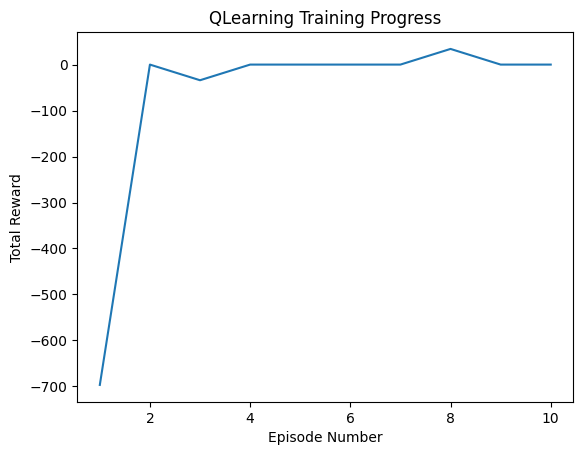

In [17]:
import matplotlib.pyplot as plt

# initializing environment
env = Environment()
agent = QLearningAgent(state_space_size=256, action_space_size=8)

# Lists to store episode number and total rewards for each episode
episode_numbers = []
total_rewards = []

# Training loop
for episode in range(10):  # Adjust the number of episodes as needed
    state = env.reset()
    total_reward = 0

    while True:
        action = agent.select_action(state)
        next_state, reward, done, _ = env.step(action)

        agent.update_q_values(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward

        if done:
            break

    # Append episode number and total reward to the lists
    episode_numbers.append(episode + 1)
    total_rewards.append(total_reward)

    # Print progress
    print(f"Episode: {episode + 1}, Total Reward: {total_reward}")

# Plotting the results
plt.plot(episode_numbers, total_rewards)
plt.xlabel('Episode Number')
plt.ylabel('Total Reward')
plt.title('QLearning Training Progress')
plt.show()
